In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dataset
dataset = pd.read_excel("dataset/Real estate valuation data set.xlsx", engine='openpyxl')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [52]:
data = np.array(dataset.iloc[:, :].T)

# Separando X e y
X_raw = data[1:-1].T
X = np.column_stack((X_raw, np.ones(X_raw.shape[0]))) # Adicionar uma coluna de 1s para considerar o termo de bias (intercept)
y = data[-1].reshape(-1, 1) # Vetorizando

X.shape, y.shape

((414, 7), (414, 1))

In [53]:
# Funções de treino para o regressor linear múltiplo de mínimos quadrados
def train_linear_regressor_ols(X, y):
    # Encontrar o estimador usando mínimos quadrados ordinários (MQO)
    estimator = np.linalg.pinv(X) @ y
    return estimator

def train_linear_regressor_rls(X, y):
    # Encontrar o estimador usando mínimos quadrados regularizados (MQR)
    estimator = np.linalg.inv(X.T @ X + 0.01 * np.eye(X.shape[1])) @ X.T @ y
    return estimator

# Treinar o regressor
estimator_ols = train_linear_regressor_ols(X, y)
estimator_rls = train_linear_regressor_rls(X, y)

print(estimator_ols.shape, estimator_rls.shape)

(7, 1) (7, 1)


In [54]:
# Função de predição usando o regressor linear múltiplo
def predict_linear_regressor(X, B):
    # Calcula a predição usando o modelo linear: y_pred = X * B
    y_pred = X @ B

    return y_pred

# Realizar a predição
y_pred_ols = predict_linear_regressor(X, estimator_ols)
y_pred_rls = predict_linear_regressor(X, estimator_rls)

print(y_pred_ols.shape, y_pred_rls.shape)
print(y.shape)

(414, 1) (414, 1)
(414, 1)


In [55]:
from sklearn.metrics import r2_score

# Avaliar o desempenho do regressor
r2_ols = r2_score(y, y_pred_ols)
r2_rls = r2_score(y, y_pred_rls)

print("R² OLS: {}".format(r2_ols))
print("R² RLS: {}".format(r2_rls))

R² OLS: 0.5823850447850889
R² RLS: 0.5767324397413489


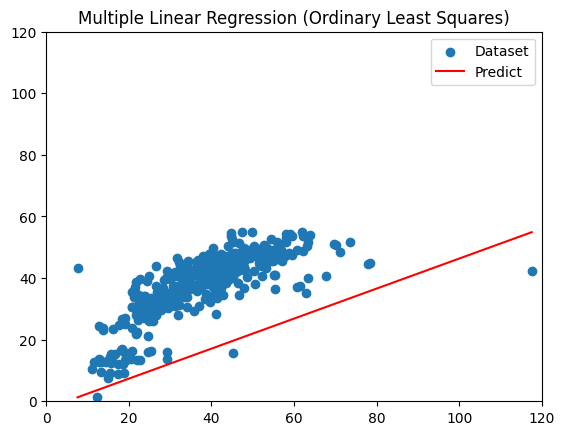

In [56]:
plt.scatter(y, y_pred_ols, label='Dataset')
plt.plot([np.min(y), np.max(y)], [np.min(y_pred_ols), np.max(y_pred_ols)], color='red', label='Predict')
plt.title('Multiple Linear Regression (Ordinary Least Squares)')
plt.legend()
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()

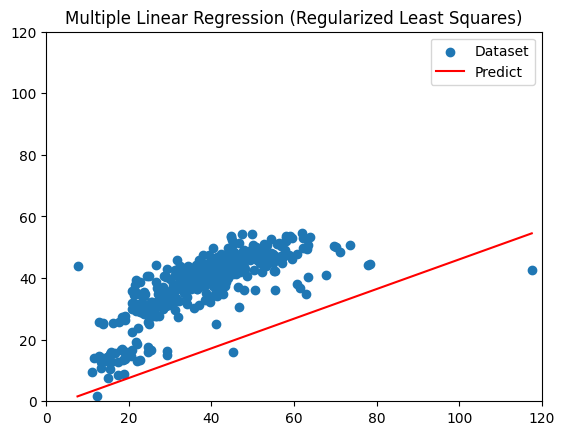

In [57]:
plt.scatter(y, y_pred_rls, label='Dataset')
plt.plot([np.min(y), np.max(y)], [np.min(y_pred_rls), np.max(y_pred_rls)], color='red', label='Predict')
plt.title('Multiple Linear Regression (Regularized Least Squares)')
plt.legend()
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()